# <center>Building Neural Network from Scratch: Regression</center>

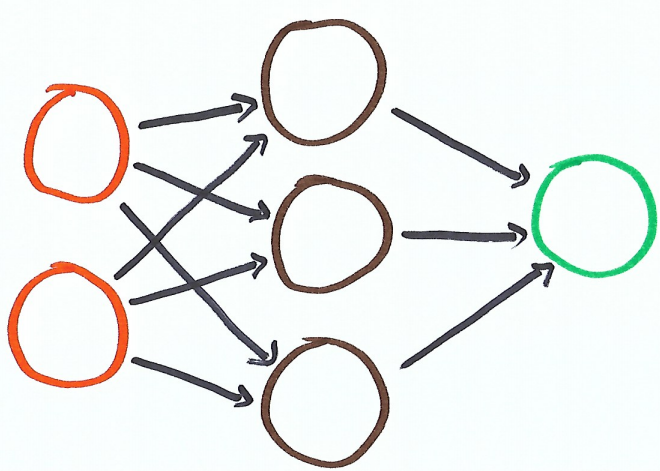

### <center>Task: Regression</center>
### <center>Activation Funcion: Linear</center>
### <center>Loss Function: Mean Squared Error</center>

## Steps:
#### 1. Initialise weight and Biases
#### 2. Select 1 row (1 student)
#### 3. Predict (Forward propogation)
#### 4. Calculate loss
####     $$L= (y - \hat y)^2$$
#### 5. Update weight and biases
####     $$W_n = W_o-\eta {\delta L\over \delta W_o}$$
#### 6. Calculate average loss

<div style="border-top: 3px solid purple;"></div>


In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.DataFrame([[6,8,3],[7,8,5],[6,8,4],[7,9,6]],columns=['CGPA','PROFILE','LPA'])

In [3]:
df


,CGPA,PROFILE,LPA
0,6,8,3
1,7,8,5
2,6,8,4
3,7,9,6


# Initialize weight and biases

In [4]:
def initialize(architecture):
    np.random.seed(3) # Generate same output each time
    parameters={} # Empty dictionary for entering parameters
    L=len(architecture) # number of Layers
    
    for i in range(1,L):
        parameters['W'+str(i)]=np.ones((architecture[i-1],architecture[i]))*0.1 # np.ones((row,columns))
        parameters['b'+str(i)]=np.zeros((architecture[i],1)) # np.zeros((row,columns))
        
    return parameters
    

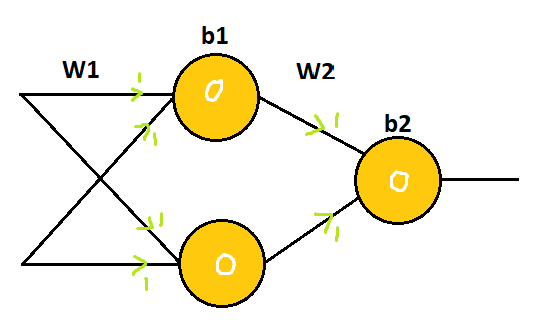

In [5]:
initialize([2,2,1]) # W1: weight in layer 1, W2: weight in layer 2, b1: bias in layer 1, b2: bias in layer 2

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

# Forward Propogation

In [6]:
def output(Prev_Out, W, b):
    Z=np.dot(W.T,Prev_Out)+b
    return Z

$$ Z = W^T . A[i] +b $$

In [7]:
def forward_propogation(X,parameters):
    A=X
    L=len(parameters)//2   #number of layer, as length of parameters is 4
    for i in range(1, L+1):
        Prev_out=A
        W1=parameters['W'+str(i)]
        b1=parameters['b'+str(i)]
        
        A=output(Prev_out,W1,b1)
        
    return A,Prev_out

In [8]:
X=df[['CGPA','PROFILE']].values[0].reshape(2,1)
y=df[['LPA']].values[0][0]

parameters=initialize([2,2,1])
forward_propogation(X,parameters)

(array([[0.28]]),
 array([[1.4],
        [1.4]]))

# Updating Weight and Bias Using Gradient Descent

In [9]:
def update(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

# Combining All

In [10]:
parameters = initialize([2,2,1])
epoch = 8

for i in range(epoch):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['CGPA', 'PROFILE']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['LPA']].values[j][0]

    # Initailizing parameters
    y_hat,A1 = forward_propogation(X,parameters)
    y_hat = y_hat[0][0]

    update(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch:',i+1,'| Loss: ',np.array(Loss).mean())

print('\nParameters at End:\n',parameters)

Epoch: 1 | Loss:  17.229684864821095
Epoch: 2 | Loss:  13.825784574735982
Epoch: 3 | Loss:  9.546617157649422
Epoch: 4 | Loss:  5.3319224823128835
Epoch: 5 | Loss:  2.528238890384782
Epoch: 6 | Loss:  1.3310979021560851
Epoch: 7 | Loss:  1.0086308944603748
Epoch: 8 | Loss:  0.9655746101998552

Parameters at End:
 {'W1': array([[0.29422089, 0.34175758],
       [0.30258654, 0.35210738]]), 'b1': array([[0.02852332],
       [0.02972747]]), 'W2': array([[0.41613723],
       [0.4494159 ]]), 'b2': array([[0.45204272]])}
